<a href="https://colab.research.google.com/github/jehanazmin/streamlit-example/blob/master/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
folder_path = '/content/drive/MyDrive/dataaa'
os.listdir(folder_path)

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/dataaa/.DS_Store
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (577).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (269).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (262).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (157).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (495).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (595).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (368).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (660).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (174).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (640).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (17).jpg
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (581).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (1141).jpg
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (462).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (609).JPG
/content/drive/MyDrive/dataaa/Blight/Corn_Blight (244).JPG
/content/drive/M

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

import PIL
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    shuffle = True,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE
)

Found 4188 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [ ]:
len(dataset)

131

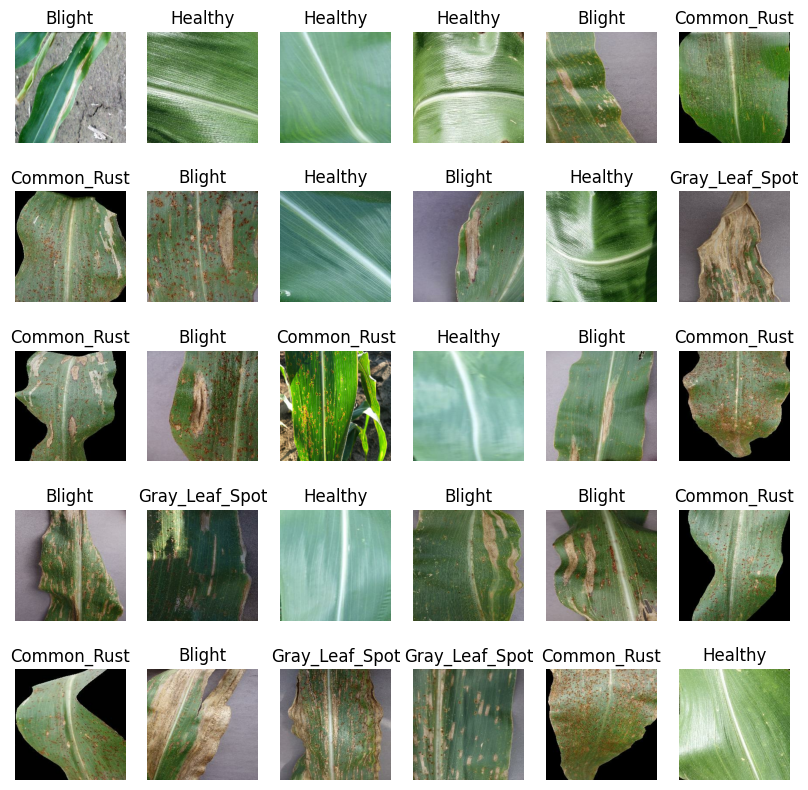

In [ ]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(30):
        ax = plt.subplot(5,6,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
def get_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [ ]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 104

Length of Validation Dataset is 13

Length of Testing Dataset is 14


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(256,256),
layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
n_classes = 4
input_shape = (BATCH_SIZE,256,256,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ['accuracy']
)

In [ ]:
history = model.fit(
train_ds,
epochs = 40,
batch_size = BATCH_SIZE,
verbose = 1,
validation_data = val_ds)

Epoch 1/40
104/104 [==============================] - 1108s 5s/step - loss: 0.7091 - accuracy: 0.7058 - val_loss: 0.3887 - val_accuracy: 0.8462
Epoch 2/40
104/104 [==============================] - 520s 5s/step - loss: 0.4303 - accuracy: 0.8213 - val_loss: 0.4145 - val_accuracy: 0.8486
Epoch 3/40
104/104 [==============================] - 520s 5s/step - loss: 0.5061 - accuracy: 0.8051 - val_loss: 0.3775 - val_accuracy: 0.8486
Epoch 4/40
104/104 [==============================] - 520s 5s/step - loss: 0.3713 - accuracy: 0.8415 - val_loss: 0.5743 - val_accuracy: 0.7885
Epoch 5/40
104/104 [==============================] - 518s 5s/step - loss: 0.3375 - accuracy: 0.8652 - val_loss: 0.2903 - val_accuracy: 0.8774
Epoch 6/40
104/104 [==============================] - 520s 5s/step - loss: 0.3324 - accuracy: 0.8643 - val_loss: 0.3086 - val_accuracy: 0.8606
Epoch 7/40
104/104 [==============================] - 516s 5s/step - loss: 0.3217 - accuracy: 0.8655 - val_loss: 0.3388 - val_accuracy: 0.865

In [ ]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 43s 1s/step - loss: 0.1880 - accuracy: 0.9241


In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=6f23bb04051e64ab24c90264c77b7502edb9923998f85b9557f1436ce0150ceb
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model = load_model()

st.write("""
         # Maize Leaf Disease Prediction
         """
         )

file = st.file_uploader("Please upload a leaf image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):

        size = (256,256)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Writing app.py
